In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [546]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/stethography vs r-r values/1000-2000.csv")

In [547]:
df.head(1000)

,stethography,rrvalues
0,-0.9110,0.780
1,-1.2304,0.782
2,0.2762,0.795
3,1.2429,0.792
4,0.7417,0.813
...,...,...
995,1.0627,0.781
996,-0.2006,0.791
997,-1.3266,0.749
998,-0.8999,0.693


In [548]:
df.describe()

,stethography,rrvalues
count,1000.000000,1000.000000
mean,0.113889,0.785401
std,0.991032,0.038255
min,-1.732500,0.650000
25%,-0.798725,0.762000
50%,0.118800,0.786000
75%,1.054600,0.811000
max,2.100400,0.885000


In [549]:
df.shape


(1000, 2)

In [550]:
cdf = df[['stethography','rrvalues']]
cdf.head(5)

,stethography,rrvalues
0,-0.9110,0.780
1,-1.2304,0.782
2,0.2762,0.795
3,1.2429,0.792
4,0.7417,0.813


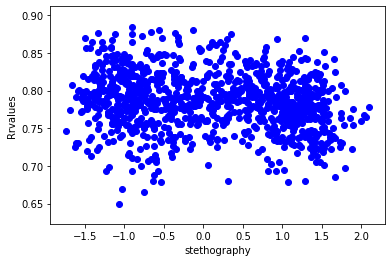

In [551]:
#graph of SNO vs r-r values

plt.scatter(cdf.stethography, cdf.rrvalues,color='blue')
plt.xlabel('stethography')
plt.ylabel('Rrvalues')
plt.show()

In [534]:
#splitting our data in 80-20 ratio for regression

In [552]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

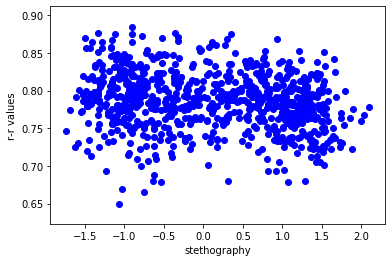

In [553]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.stethography, train.rrvalues,  color='blue')
plt.xlabel("stethography")
plt.ylabel("r-r values")
plt.show()

In [554]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['stethography']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00723063]]
Intercept:  [0.78635505]


Text(0, 0.5, 'r-r values')

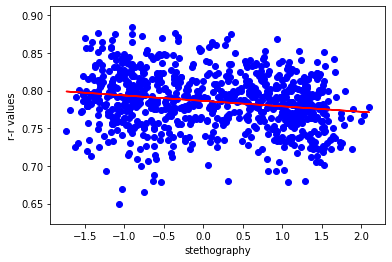

In [555]:
plt.scatter(train.stethography, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("stethography")
plt.ylabel("r-r values")

In [556]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['stethography']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -25.44


In [557]:
#using polynomial regression

In [558]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['stethography']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['stethography']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.        , -0.911     ,  0.829921  ],
       [ 1.        , -1.2304    ,  1.51388416],
       [ 1.        ,  0.2762    ,  0.07628644],
       ...,
       [ 1.        , -0.2006    ,  0.04024036],
       [ 1.        , -1.3266    ,  1.75986756],
       [ 1.        , -1.0269    ,  1.05452361]])

In [559]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.00636012 -0.00419688]]
Intercept:  [0.7903417]


Text(0, 0.5, 'r-rvalues')

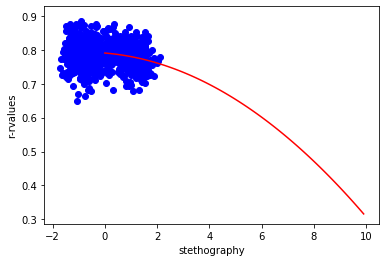

In [560]:
#plotting the polynomial regression
plt.scatter(train.stethography, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("stethography")
plt.ylabel("r-rvalues")

In [561]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -20.49
